In [68]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

import os

In [69]:
out_dir = './'

In [31]:
all_df = pd.DataFrame()

In [32]:
experiments = ['d75786f7-data-2018-01-25-big-experiment',
                '18a75a2d-data-2018-03-19-big-experiment',
              ]

n_evidence = 4

In [65]:

for in_dir in experiments:

    data,fails,parts = utils.get_data(in_dir)
        
    df = utils.get_parsed_data(data, fails, parts)
    
    df['nets'] = df['nets'].astype('str') + '-' + in_dir
    df['exp_id'] = in_dir
    
    all_df = pd.concat([all_df, df])
    

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:118: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  posteriors[i] = 0.6**x * 0.4**y


In [35]:
data[data['participant'] == 1]

,action,net,participant,turn,viewed
14,"[1, 1, 1, 1, 1, 1, 1, 1]",5,1.0,1,"[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,..."
17,"[0, 0, 0, 0, 1, 1, 1, 0]",4,1.0,1,"[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,..."
21,"[0, 1, 0, 1, 1, 0, 0, 1]",6,1.0,1,"[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,..."
22,"[1, 1, 1, 1, 1, 1, 1, 1]",7,1.0,1,"[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,..."


In [64]:
participant = 191

for i in range(len(data[data['participant'] == participant])):
    
    row = data[data['participant'] == participant].iloc[i]
    print('------------')
    print(row['turn'])

    for j in range(len(row['action'])):
        print(row['viewed'][j], row['action'][j])
    
    print()

------------
9
['fail', 'fail', 'fail', 'fail'] 0
['success', 'success', 'success', 'success'] 1
['0', '0', '0', '0'] 1
['fail', 'fail', 'fail', 'fail'] 0
['success', 'success', 'fail', 'fail'] 1
['0', '0', '0', '0'] 1
['0', '0', '0', '0'] 1
['success', 'success', 'success', 'fail'] 1

------------
9
['fail', 'fail', 'success', 'fail'] 0
['success', 'success', 'fail', 'success'] 1
['0', '0', '0', '0'] 0
['0', '0', '0', '0'] 0
['0', '0', '0', '0'] 1
['0', '0', '0', '0'] 1
['0', '0', '0', '0'] 1
['fail', 'fail', 'fail', 'success'] 0

------------
9
['success', 'fail', 'fail', 'fail'] 1
['fail', 'fail', 'success', 'fail'] 0
['0', '0', '0', '0'] 0
['fail', 'success', 'fail', 'fail'] 1
['0', '0', '0', '0'] 1
['0', '0', '0', '0'] 1
['fail', 'fail', 'success', 'fail'] 1
['0', '0', '0', '0'] 0

------------
9
['0', '0', '0', '0'] 0
['0', '0', '0', '0'] 1
['0', '0', '0', '0'] 0
['fail', 'success', 'fail', 'fail'] 0
['success', 'success', 'fail', 'fail'] 1
['0', '0', '0', '0'] 1
['0', '0', '0', 

In [74]:

turn = []
seen = []
perf = []
choice = []
net = []
item = []

for in_dir in experiments:

    data,fails,parts = utils.get_data(in_dir, 4)
        

    for i,row in data.iterrows():
    
        if len(row['viewed']) > 0:
        

            for j in range(len(row['action'])):
            
                these_successes = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'success')
                these_fails = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'fail')
            
                turn += [row['turn']]
                seen += [row['viewed'][j][0] != '0']
                perf += [these_successes - these_fails]
                choice += [row['action'][j]]
                net += [str(row['net']) + '-' + in_dir]
                item += [j]
            
indiv_choices = pd.DataFrame({'turn':turn,'seen':seen,'perf':perf,'choice':choice,'net':net,'item':item})

In [75]:
indiv_choices

,choice,item,net,perf,seen,turn
0,1,0,4-d75786f7-data-2018-01-25-big-experiment,-2,False,1
1,1,1,4-d75786f7-data-2018-01-25-big-experiment,0,False,1
2,1,2,4-d75786f7-data-2018-01-25-big-experiment,2,False,1
3,1,3,4-d75786f7-data-2018-01-25-big-experiment,2,False,1
4,1,4,4-d75786f7-data-2018-01-25-big-experiment,-2,False,1
5,1,5,4-d75786f7-data-2018-01-25-big-experiment,2,False,1
6,1,6,4-d75786f7-data-2018-01-25-big-experiment,0,False,1
7,1,7,4-d75786f7-data-2018-01-25-big-experiment,4,False,1
8,1,0,7-d75786f7-data-2018-01-25-big-experiment,2,False,1
9,0,1,7-d75786f7-data-2018-01-25-big-experiment,-2,False,1


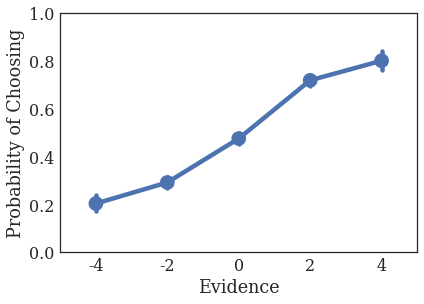

In [76]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot('perf', 'choice', data = indiv_choices[seen])
plt.ylim(0,1)
plt.xlabel('Evidence')
plt.ylabel('Probability of Choosing')
plt.savefig('response-curve.jpg', bbox_inches = 'tight')

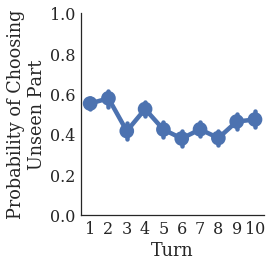

In [77]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.factorplot('turn', 'choice', data = indiv_choices[~np.array(seen)])
plt.xlabel('Turn')
plt.ylabel('Probability of Choosing\nUnseen Part')
plt.ylim(0,1)
plt.savefig('unseen-parts.jpg', bbox_inches = 'tight')